## Matrix Multiplication
Hello world tensorflow example for random matrix multiplication.
[Source tutorial blog](https://medium.com/@erikhallstrm/hello-world-tensorflow-649b15aed18c)

### IMPORTS

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

Function to matrix multiplication and return run time of the calculation  
removed the GPU based calculation as I am working on mac and TensorFlow 1.2+ doesn't support GPU in mac

In [13]:
def get_times(maximum_time):
    """Calculates time taken to multiply matrix using TensorFlow API
       it stops when the matrix multiplication time is more than input maximum_time
    """
    device_name =  "/cpu:0"
    device_times = {
        device_name:[]
    }
    # various matrix sizes
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        print("####### Calculating on the " + device_name + " ####### for size: " + str(size))

        shape = (size,size)
        data_type = tf.float16
        # Generate 2 tensor matrix of given size randomly using uniform distribution
        # https://www.tensorflow.org/api_docs/python/tf/random_uniform
        r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
        r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)

        # Define matrix multiplication on the above generated matrix
        # https://www.tensorflow.org/api_docs/python/tf/matmul
        dot_operation = tf.matmul(r2, r1)

        # Create a session where a graph or particular operation can be run
        with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
            start_time = time.time()
            # Run the matrix multiplication operation
            result = session.run(dot_operation)
            time_taken = time.time() - start_time
            # print(result)
            device_times[device_name].append(time_taken)

        # Print the time taken to run the current matrices multiplication operation
        print(device_times)

        # return when the matrix multiplication time exceeds the maximum time limit input
        if time_taken > maximum_time:
            return device_times, matrix_sizes


####### Calculating on the /cpu:0 ####### for size: 500
{'/cpu:0': [0.7971220016479492]}
####### Calculating on the /cpu:0 ####### for size: 550
{'/cpu:0': [0.7971220016479492, 0.9182138442993164]}
####### Calculating on the /cpu:0 ####### for size: 600
{'/cpu:0': [0.7971220016479492, 0.9182138442993164, 1.132789134979248]}
####### Calculating on the /cpu:0 ####### for size: 650
{'/cpu:0': [0.7971220016479492, 0.9182138442993164, 1.132789134979248, 1.4084229469299316]}
####### Calculating on the /cpu:0 ####### for size: 700
{'/cpu:0': [0.7971220016479492, 0.9182138442993164, 1.132789134979248, 1.4084229469299316, 1.719778060913086]}


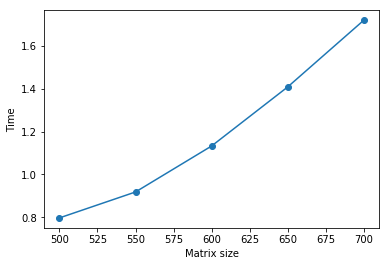

In [14]:
device_times, matrix_sizes = get_times(1.5)
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()